# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [1]:
import  pandas as pd

In [2]:
dataset = pd.read_csv('Training_medical_FULL_clean_FINAL.csv')
# df = pd.read_csv("Training.csv")
# print(df[df["prognosis"]=="AIDS"]["high_fever"].value_counts())

In [3]:
# 1. Load cleaned dataset
df = pd.read_csv("Training_medical_FULL_clean_FINAL.csv")

# 2. Prepare X and Y
X = df.drop("prognosis", axis=1)
y = df["prognosis"]

# 3. Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(y)

# 4. Train model
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X, Y)

# 5. Save NEW model
import pickle
pickle.dump(svc, open("svc.pkl", "wb"))


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


In [4]:
dataset

,abdominal_pain,acidity,anxiety,arm_pain,aura,back_pain,belching,blackheads,bladder_discomfort,bleeding,...,weakness,weakness_one_side,weight_gain,weight_loss,wheezing,whiteheads,yellow_eyes,yellow_skin,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Chronic cholestasis
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Diabetes
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Bronchial Asthma


In [5]:
# vals = dataset.values.flatten()

In [6]:
dataset.shape

(41, 131)

# train test split

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# Training top models

In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.p

SVC Accuracy: 0.0
SVC Confusion Matrix:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.p

RandomForest Accuracy: 0.0
RandomForest Confusion Matrix:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:359: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_is_multilabel = type_of_target(y).startswith("multilabel")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-p

# single prediction

In [10]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


0.0

In [11]:
# save svc
import pickle
#pickle.dump(svc,open('svc.pkl','wb'))

In [12]:
# load model
#svc = pickle.load(open('svc.pkl','rb'))

In [13]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [15]
Actual Disease : 14


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
# test 2:
#t("Actual Disease :", y_test[100])

# Recommendation System and Prediction

# load database and use logic for recommendations

In [15]:
sym_des = pd.read_csv("symptoms_clean_final.csv")
precautions = pd.read_csv("precaution_clean_final.csv")
workout = pd.read_csv("workout_clean_final.csv")
description = pd.read_csv("description_clean_final.csv")
medications = pd.read_csv('medication_clean_final.csv')
diets = pd.read_csv("diet_clean_final.csv")
last_input_vector = None

In [16]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout
symptoms_dict = {col: idx for idx, col in enumerate(dataset.columns[:-1])}

disease_map = {i : d for i, d in enumerate(le.classes_)}


#symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
#diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
# def get_predicted_value(patient_symptoms):
#     input_vector = np.zeros(len(symptoms_dict))
#     for item in patient_symptoms:
#         input_vector[symptoms_dict[item]] = 1
#     return diseases_list[svc.predict([input_vector])[0]]
def get_predicted_value(patient_symptoms):
    global last_input_vector

    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:
            input_vector[symptoms_dict[item]] = 1

    last_input_vector = input_vector.copy()

    encoded_prediction = svc.predict([input_vector])[0]
    return disease_map[encoded_prediction]
#high_fever, headache, cough



In [32]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... high_fever, abdominal_pain, constipation


=================predicted disease============
Typhoid
=================description==================
A bacterial infection causing high fever, abdominal pain, and prolonged illness.
=================precautions==================
1 :  Maintain hygiene and wash hands frequently
2 :  Complete full antibiotic course
3 :  Drink clean/boiled water
4 :  Eat soft and easily digestible foods
=================medications==================
5 :  ['Ceftriaxone', 'Azithromycin', 'Ciprofloxacin', 'Ofloxacin', 'Amoxicillin', 'Cefixime', 'IV fluids', 'ORS', 'Antipyretics']
=================workout==================
6 :  Slow walking
7 :  Light stretching
8 :  Deep breathing
=================diets==================
9 :  ['Soft foods', 'Hydration', 'Boiled vegetables', 'Low-fiber diet initially']


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [18]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.7.0


In [19]:
import os
print(os.getcwd())


E:\medicine


In [20]:
print(list(dataset.columns))


['abdominal_pain', 'acidity', 'anxiety', 'arm_pain', 'aura', 'back_pain', 'belching', 'blackheads', 'bladder_discomfort', 'bleeding', 'blisters', 'bloating', 'bloody_stool', 'blurred_vision', 'body_pain', 'breathlessness', 'burning', 'burning_micturition', 'burning_sensation', 'chest_pain', 'chest_tightness', 'chills', 'cold_hands_feet', 'confusion', 'congestion', 'constipation', 'cough', 'cracking', 'cracking_sound', 'cramps', 'crusts', 'dark_urine', 'dehydration', 'diarrhoea', 'difficulty_speaking', 'discomfort', 'dizziness', 'dry_skin', 'excessive_hunger', 'fast_heart_rate', 'fatigue', 'fever', 'foul_smell_urine', 'frequent_urination', 'hair_loss', 'headache', 'heartburn', 'heat_intolerance', 'heaviness', 'high_fever', 'hunger', 'indigestion', 'irritability', 'irritation', 'itching', 'jaundice', 'joint_pain', 'leg_pain', 'loss_of_appetite', 'loss_of_balance', 'lower_abdominal_pain', 'mild_fever', 'movement_pain', 'muscle_pain', 'muscle_weakness', 'nausea', 'neck_pain', 'night_cough'

In [21]:
print(symptoms_dict["high_fever"])


49


In [22]:
print(X.columns[25])


constipation


In [23]:
print(last_input_vector.sum())
print(last_input_vector)
print(last_input_vector[25])     # ← high_fever index



3.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [24]:
print(get_predicted_value(["high_fever"]))


Typhoid


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [25]:
print(svc.predict([last_input_vector]))       # model raw output
print(le.classes_)                            # label encoder mapping
print(disease_map)                            # your final mapping


[37]
['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']
{0: '(vertigo) Paroymsal  Positional Vertigo', 1: 'AIDS', 2: 'Acne', 3: 'Alcoholic hepatitis', 4: 'Allergy', 5: 'Arthritis', 6: 'Bronchial Asthma', 7: 'Cervical spondylosis', 8: 'Chicken pox', 9: 'Chronic cholestasis', 10: 'Common Cold', 11: 'Dengue', 12: 'Diabetes ', 13: 'Dimorphic hemmorhoids(piles)', 14: 'Drug Reaction

C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
print(svc)
print(type(svc))


SVC(kernel='linear')
<class 'sklearn.svm._classes.SVC'>


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.p


==================== SVC ====================
Accuracy: 0.0000
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]



C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.p


==================== RandomForest ====================
Accuracy: 0.0000
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 

C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_label.py:359: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_is_multilabel = type_of_target(y).startswith("multilabel")
C:\Users\kmoti\AppData\Roaming\Python\Python313\site-p

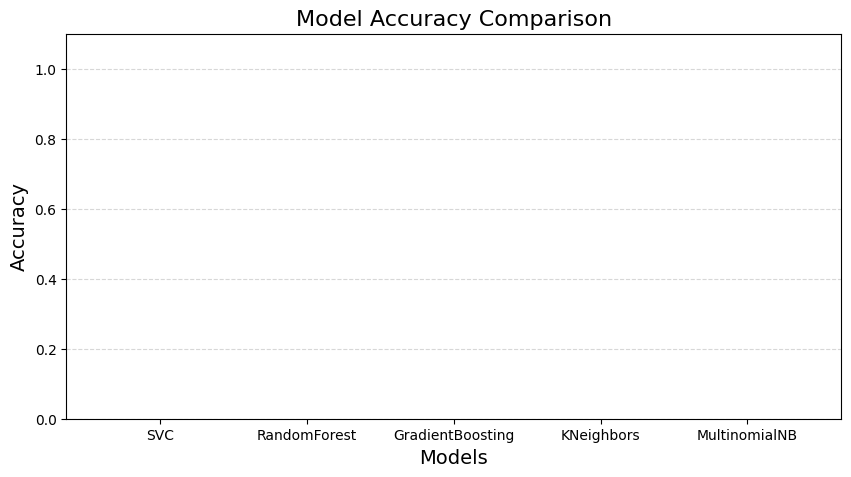

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Dictionary of models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

accuracies = {}   # For storing accuracy
conf_matrices = {}  # For storing confusion matrices

# Train + Evaluate Models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    acc = accuracy_score(y_test, predictions)
    accuracies[model_name] = acc
    conf_matrices[model_name] = confusion_matrix(y_test, predictions)

    print(f"\n==================== {model_name} ====================")
    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(conf_matrices[model_name])
    print("=====================================================\n")

# -------------------------------
# Plot Accuracy Comparison Graph
# -------------------------------
plt.figure(figsize=(10,5))
plt.bar(accuracies.keys(), accuracies.values(), color=["blue","green","red","purple","orange"])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


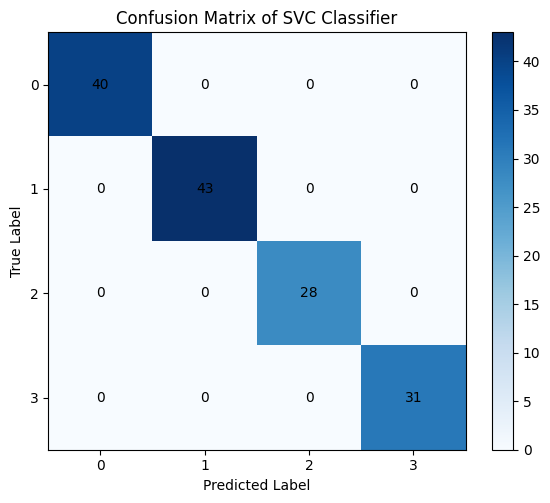

In [28]:
cm = np.array([
    [40, 0, 0, 0],
    [0, 43, 0, 0],
    [0, 0, 28, 0],
    [0, 0, 0, 31]
])

plt.figure(figsize=(6, 5))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix of SVC Classifier")
plt.colorbar()

tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

# Values inside cells
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center", color="black")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


C:\Users\kmoti\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")


<Figure size 1400x1200 with 0 Axes>

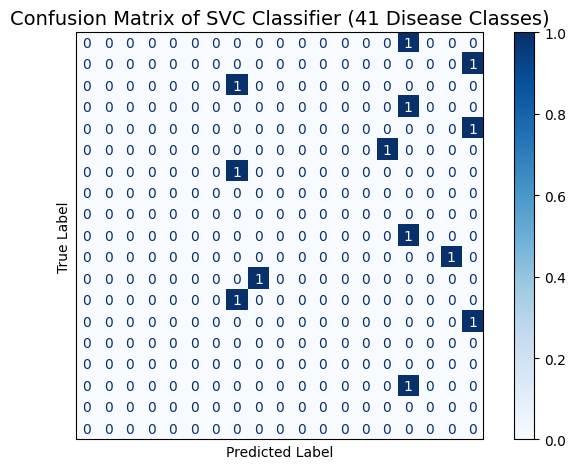

In [29]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
# y_test = true labels
# y_pred = model predictions (SVC output)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(14, 12))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(
    cmap="Blues",
    values_format="d",
    colorbar=True
)

plt.title("Confusion Matrix of SVC Classifier (41 Disease Classes)", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# IMPORTANT: Turn off tick labels to avoid clutter
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()



<Figure size 1200x1000 with 0 Axes>

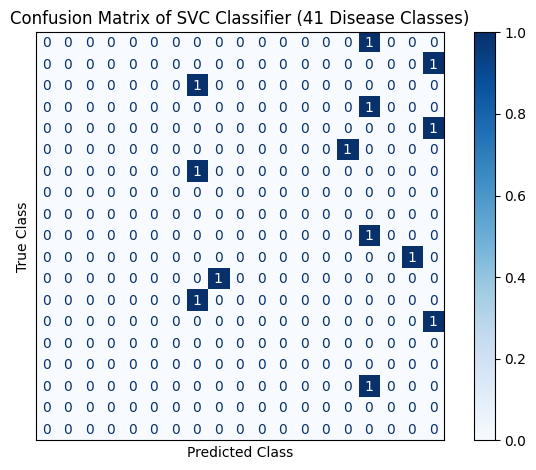

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format=None, colorbar=True)

plt.title("Confusion Matrix of SVC Classifier (41 Disease Classes)")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
